### Description

In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques! 

### Evaluation Metric
The evaluation metric for this competition is the root mean-squared error or RMSE. RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better. One nice property of RMSE is that the error is given in the units being measured, so you can tell very directly how incorrect the model might be on unseen data.

RMSE is given by:

                                 

where \\( y_i \\) is the ith observation and
     

is the prediction for that observation. 

Example 1. Suppose we have one observation, with an actual value of 12.5 and a prediction of 12.5 (good job!). The RMSE will be:

                       

Example 2. We'll add another data point. Your prediction for the second data point is 11.0 and the actual value is 14.0. The RMSE will be:

                                                

**Kernel Submissions**

You can make submissions directly from Kaggle Kernels. By adding your teammates as collaborators on a kernel, you can share and edit code privately with them.

**Submission File**

For each key in the test set, you must predict a value for the fare_amount variable. The file should contain a header and have the following format:

## Objectives

Determine the taxi fare given inputs using:
  * Tensorflow
  * PyTorch
  * Scikit Learn

## Doing the imports

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  torch
import torch.nn as nn
import tensorflow as tf
import os
import datetime
import plotly.offline as pyo
import plotly.graph_objs as go
%matplotlib inline

In [106]:
# df=pd.read_csv(os.getcwd()+"\\DATA\\taxi\\train.csv")

In [107]:
# df=pd.read_csv("./DATA/taxi/train.csv")

In [128]:
df=pd.read_csv("./DATA/taxi/train_taxi.csv",delimiter="\t")

In [130]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1048575 non-null  object 
 1   fare_amount        1048575 non-null  float64
 2   pickup_datetime    1048575 non-null  object 
 3   pickup_longitude   1048575 non-null  float64
 4   pickup_latitude    1048575 non-null  float64
 5   dropoff_longitude  1048565 non-null  float64
 6   dropoff_latitude   1048565 non-null  float64
 7   passenger_count    1048575 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


In [140]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

### Game Plan

* Data cleaning and wrangling
* Data Visualization using matplotlib and/or plotly dash
* Feature Engineering -> transform all data into numeric values


In [132]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [133]:
#checking that no missing value is there
df.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [143]:
len(df)

1048575

In [147]:
len(df)

1048565

In [146]:
df.dropna(inplace=True)

In [134]:
# Data Visualization


Text(0.5, 1.0, 'distribution of fare amount')

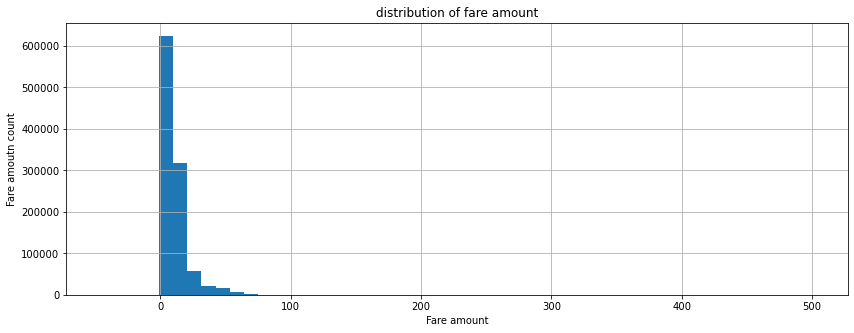

In [148]:
plt.figure(figsize=(14,5))
df["fare_amount"].hist(bins=50)
plt.xlabel("Fare amount")
plt.ylabel("Fare amoutn count")
plt.title("distribution of fare amount")

In [149]:
df["passenger_count"].value_counts()

1      724988
2      155231
5       74085
3       45910
4       22443
6       22192
0        3714
208         1
9           1
Name: passenger_count, dtype: int64

In [150]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### Plotly visualization

In [120]:

# traces = go.Scattergeo(
#         lon = df["pickup_longitude"],
#         lat = df["pickup_latitude"],
#         hoverinfo = 'text',
#         text = "fare_amount",
#         mode = 'markers',
        
#         marker = dict( 
#             size=5, 
#             color = df["fare_class"],
#             line = dict(
#                 width=1,
#                 color = "white"
#             )))
# data=[traces]

# layout = go.Layout(
#     title = 'Geographical distribution of Taxi pick up points ',
#     hovermode='closest')
    
# fig=go.Figure(data, layout)

# pyo.plot(fig, filename="scatter.html")

In [151]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048565 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1048565 non-null  object 
 1   fare_amount        1048565 non-null  float64
 2   pickup_datetime    1048565 non-null  object 
 3   pickup_longitude   1048565 non-null  float64
 4   pickup_latitude    1048565 non-null  float64
 5   dropoff_longitude  1048565 non-null  float64
 6   dropoff_latitude   1048565 non-null  float64
 7   passenger_count    1048565 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 72.0+ MB


In [153]:
# 4hour difference between UTC timestamps and location time - need to convert to eastern time EDT
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21,13,pm,Mon
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 12:52:16,12,pm,Tue
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00,20,pm,Wed
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42,0,am,Sat
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 03:51:00,3,am,Tue


In [154]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [155]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21,13,pm,Mon,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 12:52:16,12,pm,Tue,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00,20,pm,Wed,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42,0,am,Sat,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 03:51:00,3,am,Tue,1.999157


In [156]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']  # this column contains the labels

In [157]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048565 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   key                1048565 non-null  object        
 1   fare_amount        1048565 non-null  float64       
 2   pickup_datetime    1048565 non-null  object        
 3   pickup_longitude   1048565 non-null  float64       
 4   pickup_latitude    1048565 non-null  float64       
 5   dropoff_longitude  1048565 non-null  float64       
 6   dropoff_latitude   1048565 non-null  float64       
 7   passenger_count    1048565 non-null  int64         
 8   EDTdate            1048565 non-null  datetime64[ns]
 9   Hour               1048565 non-null  category      
 10  AMorPM             1048565 non-null  category      
 11  Weekday            1048565 non-null  category      
 12  dist_km            1048565 non-null  float64       
dtypes: category(3), datetime64[

In [58]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [159]:
df["year"]=df["EDTdate"].dt.year
df["month"]=df["EDTdate"].dt.month
df["day"]=df["EDTdate"].dt.day

In [160]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km,year,month,day
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21,13,pm,Mon,1.030764,2009,6,15
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 12:52:16,12,pm,Tue,8.450134,2010,1,5
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00,20,pm,Wed,1.389525,2011,8,17
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42,0,am,Sat,2.799270,2012,4,21
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 03:51:00,3,am,Tue,1.999157,2010,3,9


In [161]:
df=df.drop(["key","pickup_datetime","EDTdate"], axis=1)

In [162]:
df["hour"] = df['Hour'].cat.codes
df["ampm"] = df['AMorPM'].cat.codes
df["wkdy"] = df['Weekday'].cat.codes


In [163]:
df=df.drop(["Hour","AMorPM","Weekday"], axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048565 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1048565 non-null  float64
 1   pickup_longitude   1048565 non-null  float64
 2   pickup_latitude    1048565 non-null  float64
 3   dropoff_longitude  1048565 non-null  float64
 4   dropoff_latitude   1048565 non-null  float64
 5   passenger_count    1048565 non-null  int64  
 6   dist_km            1048565 non-null  float64
 7   year               1048565 non-null  int64  
 8   month              1048565 non-null  int64  
 9   day                1048565 non-null  int64  
 10  hour               1048565 non-null  int8   
 11  ampm               1048565 non-null  int8   
 12  wkdy               1048565 non-null  int8   
dtypes: float64(6), int64(4), int8(3)
memory usage: 91.0 MB


In [165]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,year,month,day,hour,ampm,wkdy
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,13,1,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,12,1,5
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,17,20,1,6
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,0,0,2
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,3,0,5


In [179]:
X=df.drop("fare_amount", axis=1)
y=df["fare_amount"]

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [182]:
X_train=tf.constant(X_train)
X_test=tf.constant(X_test)
y_train=tf.constant(y_train)
y_test=tf.constant(y_test)

In [183]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([786423, 12]),
 TensorShape([262142, 12]),
 TensorShape([786423]),
 TensorShape([262142]))

### Scaling the input data

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler=MinMaxScaler()

In [186]:
X_train=scaler.fit_transform(X_train)

In [187]:
X_test=scaler.transform(X_test)

In [188]:
X_train.shape

(786423, 12)

In [189]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((786423, 12), TensorShape([786423]), (262142, 12), TensorShape([262142]))

### Machine learning using:
  * Tensorflow

### Creating a Model

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [194]:
#relu rectified lienar unit
model = Sequential()

# 4 hidden layers
model.add(Dense(12, input_shape=(12,),activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12,activation="relu"))

#Output Layer
model.add(Dense(1))

# method of optimization and evaluation
model.compile(optimizer="adam", loss="mse")

In [195]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 12)                156       
                                                                 
 dense_21 (Dense)            (None, 12)                156       
                                                                 
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 dense_23 (Dense)            (None, 12)                156       
                                                                 
 dense_24 (Dense)            (None, 1)                 13        
                                                                 
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


In [196]:
from tensorflow.keras.callbacks import EarlyStopping

In [197]:
early_stop=EarlyStopping(monitor="val_loss", patience=3)

In [198]:
model.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test),
                                     callbacks=[early_stop])

Epoch 1/50
24576/24576 [==============================] - 86s 3ms/step - loss: 95.8503 - val_loss: 93.8211
Epoch 2/50
24576/24576 [==============================] - 87s 4ms/step - loss: 95.3702 - val_loss: 93.5370
Epoch 3/50
24576/24576 [==============================] - 87s 4ms/step - loss: 82.4250 - val_loss: 28.0916
Epoch 4/50
24576/24576 [==============================] - 88s 4ms/step - loss: 30.1747 - val_loss: 27.5374
Epoch 5/50
24576/24576 [==============================] - 86s 4ms/step - loss: 29.4980 - val_loss: 33.6227
Epoch 6/50
24576/24576 [==============================] - 83s 3ms/step - loss: 29.2284 - val_loss: 26.5951
Epoch 7/50
24576/24576 [==============================] - 87s 4ms/step - loss: 29.0082 - val_loss: 26.3175
Epoch 8/50
24576/24576 [==============================] - 87s 4ms/step - loss: 28.8523 - val_loss: 26.9362
Epoch 9/50
24576/24576 [==============================] - 87s 4ms/step - loss: 28.6520 - val_loss: 26.1472
Epoch 10/50
24576/24576 [============

In [199]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

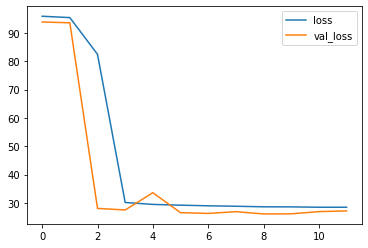

In [200]:
losses.plot()

### Evaluation Data

In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [202]:
predictions=model.predict(X_test)

In [203]:
MAE=mean_absolute_error(y_test,predictions)

In [204]:
MAE

2.674798699897231

In [205]:
predictions[:5]

array([[12.698127],
       [17.654387],
       [15.564724],
       [ 7.990823],
       [11.412095]], dtype=float32)

In [206]:
y_test[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([12. , 18.5, 15.5,  7.7, 12.1])>

In [207]:
MSE=mean_squared_error(y_test,predictions)
MSE

27.204157398652114

In [208]:
RMSE=np.sqrt(MSE)
RMSE

5.215760481334636

In [209]:
## Visualize our prediction in a scatter plot

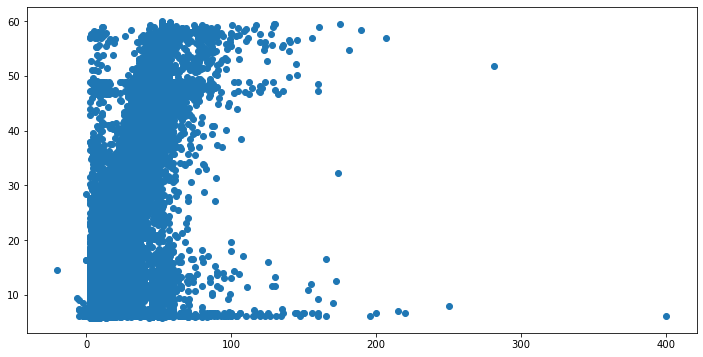

In [211]:
plt.figure(figsize=(12,6))

plt.scatter(y_test,predictions)

#plt.plot(y_test,y_test,"r")


### Machine learning using :
* PyTorch